# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [24]:
# your answer here
import pandas as pd
import numpy as np
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [5]:
# your answer here

employee = pd.read_csv(r"C:\Users\crocs\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Gonçalo\College&Courses\Data Analytics- IronHack\Course Data Analytics\Labs\Week4\lab-pivot-table-and-correlation\your_code\data\Employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [13]:
# Method 1
# your answer here

employee.pivot_table(index = "Department")

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


In [16]:
# Method 2
# your answer here

employee.groupby(by="Department", axis=0).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [18]:
# your answer here

employee.pivot_table(index = ["Department","Title"], values = ["Salary"], aggfunc={"Salary":"mean"})

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [21]:
# your answer here

employee.pivot_table(index = ["Department","Title"], values = ["Salary","Years"], aggfunc={"Salary":"mean","Years":"mean"})

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [23]:
# your answer here

employee.pivot_table(index = ["Title"], values = ["Salary","Name"], aggfunc={"Salary":"mean","Name":"count"})

,Name,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [26]:
# your answer here

employee.pivot_table(index = ["Title"], values = ["Salary"], aggfunc={"Salary":["median","min","max","std"]})

Salary                       
             max median   min       std
Title                                  
VP          70.0   70.0  70.0  0.000000
analyst     35.0   32.5  30.0  2.886751
associate   60.0   55.0  55.0  2.886751

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here




#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [29]:
# your answer here

print(employee.pivot_table(index = ["Department"], values = ["Name","Salary"], aggfunc={"Salary":"sum","Name": "count"}))
employee["Salary"].sum()

            Name  Salary
Department              
HR             3     135
IT             4     195
Sales          2     110


440

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [32]:
# your answer here

employee.pivot_table(index = ["Department","Title"], values = ["Salary","Years"], aggfunc={"Salary":"mean","Years":"sum"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here



# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [5]:
# your answer here

Fitbit = pd.read_csv(r"C:\Users\crocs\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Gonçalo\College&Courses\Data Analytics- IronHack\Course Data Analytics\Labs\Week4\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv")
Fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [35]:
# your answer here

Fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [ ]:
# your answer here


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [43]:
# your answer here

Fitbit.corr()

#Minutes Very Active have a high correlation with Steps

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

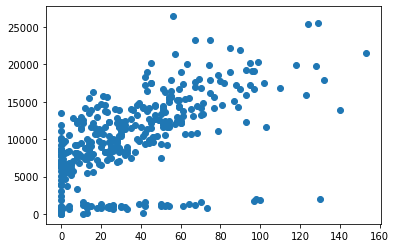

In [47]:
# your answer here

import matplotlib.pyplot as plt

plt.scatter(x = Fitbit["Minutes Very Active"], y = Fitbit["Steps"])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
    #As minutes of activity increases the number of steps also increase

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

#The value of correlation is 0.076906, so we can conclude that there is no correlation between these 2 variables.

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

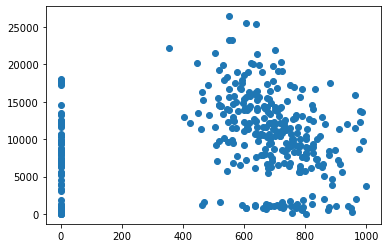

In [48]:
# your answer here


plt.scatter(x = Fitbit["Minutes Sedentary"], y = Fitbit["Steps"])
plt.show()

    #they are independent from each other

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [ ]:
# your answer here

# AS we already done the correlation matrix,    The correlation is also low (0.130986) 

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

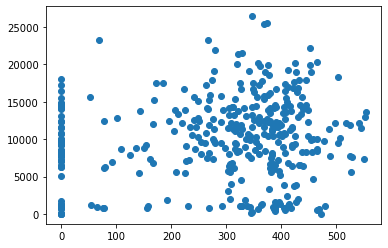

In [49]:
# your answer here


plt.scatter(x = Fitbit["MinutesOfSleep"], y = Fitbit["Steps"])
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [1]:
# your answer here

In [19]:
cor_fit = Fitbit[["Calorie burned","Steps","Floors","Minutes Sedentary","Minutes Very Active","MinutesOfSleep"]]
cor_fit.head(3)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

<bound method DataFrame.sort_values of                      Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  >


<AxesSubplot:>

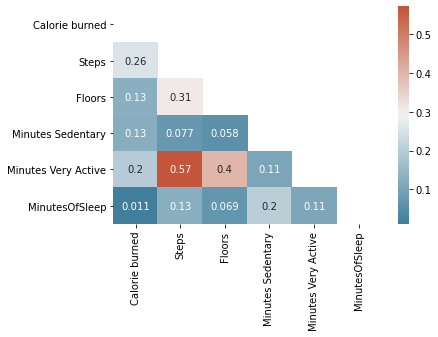

In [32]:
print(cor_fit.corr().sort_values)

mask = np.triu(np.ones_like(cor_fit.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(cor_fit.corr(), annot=True, mask = mask, cmap=cmap)

In [ ]:
# your answer here


#The highest correlated columns are Steps vs Minutes Very Active , Floors vs Minutes Very Active and Steps vs Floors

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [33]:
# your answer here

Time_Grades = pd.read_csv(r"C:\Users\crocs\OneDrive - Universidade de Lisboa\Ambiente de Trabalho\Gonçalo\College&Courses\Data Analytics- IronHack\Course Data Analytics\Labs\Week4\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv")
Time_Grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

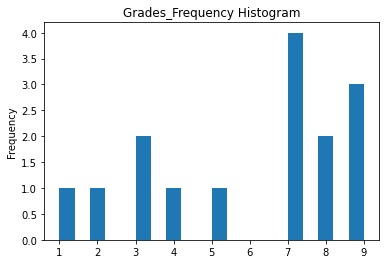

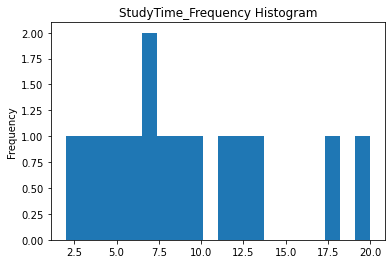

In [38]:
# your answer here
import matplotlib.pyplot as plt

plt.hist(Time_Grades['Grade'], bins=20)
plt.gca().set(title='Grades_Frequency Histogram', ylabel='Frequency')
plt.show()

plt.hist(Time_Grades['Study time'], bins=20)
plt.gca().set(title='StudyTime_Frequency Histogram', ylabel='Frequency')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [42]:
# your answer here

    #Pearson correlation:
Time_Grades.corr("pearson")

    #Spearman correlation:
Time_Grades.corr("spearman")

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

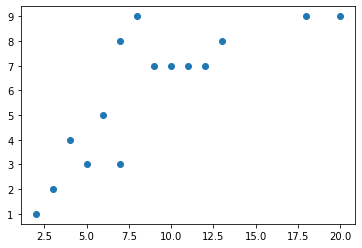

In [44]:
# your answer here

plt.scatter(Time_Grades["Study time"],Time_Grades["Grade"])

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# # your answer here:


# The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

# For example, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.


# The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.